In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [35]:
df = pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [37]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [38]:
imputable_col = [x for x in df.columns if df[x].isnull().mean() >= 0.05]
imputable_col

['Age', 'Fare']

In [39]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Using Pandas

### fillna

In [42]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()

fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
print(age_mean,age_median,fare_mean,fare_median)

29.69911764705882 28.0 32.279338297872336 14.4542


In [43]:
X_train['Age_mean'] = df['Age'].fillna(age_mean)
X_train['Age_median'] = df['Age'].fillna(age_median)

X_train['Fare_mean'] = df['Fare'].fillna(fare_mean)
X_train['Fare_median'] = df['Fare'].fillna(fare_median)

X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.0,8.6625,8.6625
584,NaN,8.7125,0,29.699118,28.0,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.0,49.5042,49.5042
527,NaN,221.7792,0,29.699118,28.0,221.7792,221.7792


### check variance

In [44]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  162.33852985330878
Age Variance after mean imputation:  161.813866455868
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.098181126126
Fare Variance after mean imputation:  2324.2440261087


# check distribution

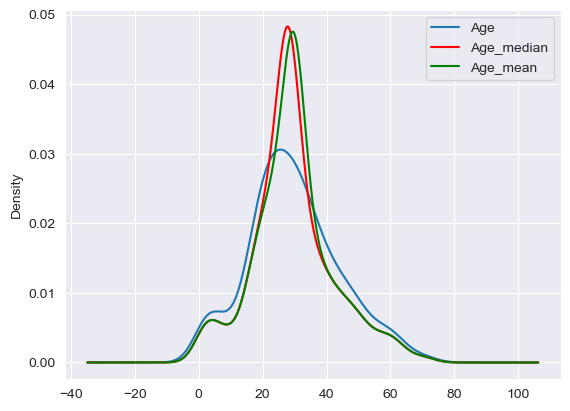

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

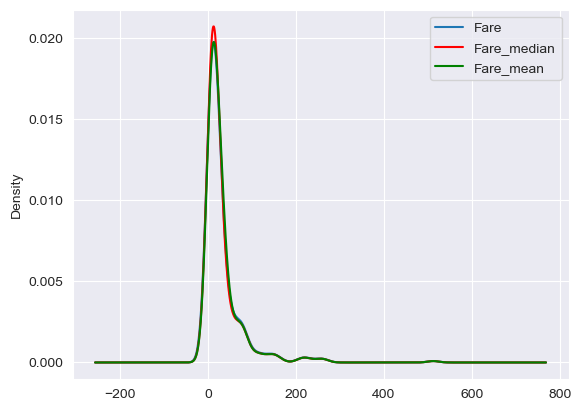

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## check covariance

In [47]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.631558,64.858451
Fare,70.719262,2448.197914,17.258917,55.800924,59.661820,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.143296,-5.088278,16.386748,16.476326
Age_mean,204.349513,55.800924,-5.143296,161.813866,161.838181,52.948856,51.541608
Age_median,204.349513,59.661820,-5.088278,161.838181,162.338530,56.613065,55.142638
Fare_mean,66.631558,2448.197914,16.386748,52.948856,56.613065,2324.244026,2324.533881
Fare_median,64.858451,2448.197914,16.476326,51.541608,55.142638,2324.533881,2340.098181


## check correlation

In [48]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090109,0.087355
Fare,0.092644,1.000000,0.208268,0.088382,0.094361,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244475,-0.241469,0.205520,0.205942
Age_mean,1.000000,0.088382,-0.244475,1.000000,0.998533,0.086339,0.083759
Age_median,1.000000,0.094361,-0.241469,0.998533,1.000000,0.092165,0.089466
Fare_mean,0.090109,1.000000,0.205520,0.086339,0.092165,1.000000,0.996731
Fare_median,0.087355,1.000000,0.205942,0.083759,0.089466,0.996731,1.000000


## check boxplot for outlier

<Axes: >

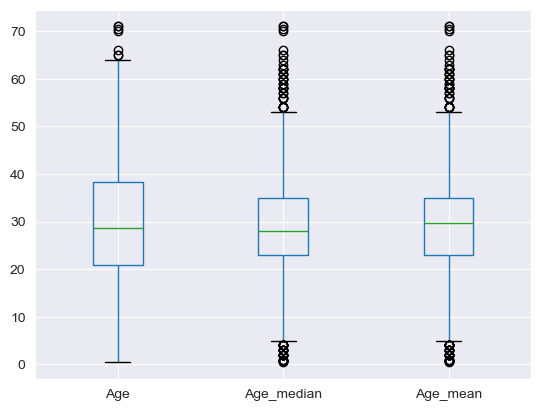

In [49]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

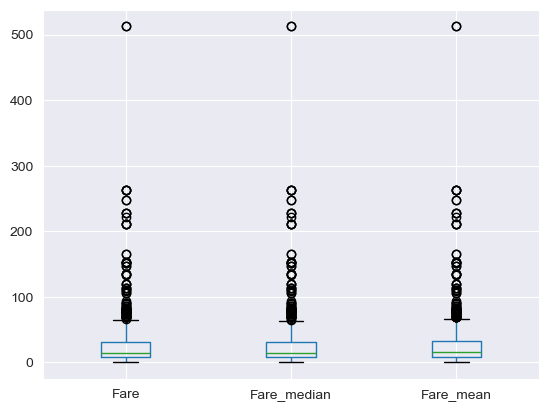

In [50]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [53]:
trf = ColumnTransformer(transformers=[
    ('imp1',SimpleImputer(strategy='mean'),[0]),
    ('imp2',SimpleImputer(strategy='median'),[1])
],remainder='passthrough')

In [55]:
X_train= trf.fit_transform(X_train)
X_test= trf.fit_transform(X_test)

In [56]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])